<a href="https://colab.research.google.com/github/phoomth/Smart-pH-Chart/blob/main/Water_test_kit_pH_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pH1_1.png to pH1_1.png
Saving pH1_2.png to pH1_2.png
Saving pH1_3.png to pH1_3.png
Saving pH1_4.png to pH1_4.png
Saving pH1_5.png to pH1_5.png
Saving pH1_6.png to pH1_6.png
Saving pH1_7.png to pH1_7.png
Saving pH2_1.png to pH2_1.png
Saving pH2_2.png to pH2_2.png
Saving pH2_3.png to pH2_3.png
Saving pH2_4.png to pH2_4.png
Saving pH2_5.png to pH2_5.png
Saving pH2_6.png to pH2_6.png
Saving pH2_7.png to pH2_7.png
Saving pH3_1.png to pH3_1.png
Saving pH3_2.png to pH3_2.png
Saving pH3_3.png to pH3_3.png
Saving pH3_4.png to pH3_4.png
Saving pH3_5.png to pH3_5.png
Saving pH3_6.png to pH3_6.png
Saving pH3_7.png to pH3_7.png
Saving pH4_1.png to pH4_1.png
Saving pH4_2.png to pH4_2.png
Saving pH4_3.png to pH4_3.png
Saving pH4_4.png to pH4_4.png
Saving pH4_5.png to pH4_5.png
Saving pH4_6.png to pH4_6.png
Saving pH4_7.png to pH4_7.png
Saving pH5_1.png to pH5_1.png
Saving pH5_2.png to pH5_2.png
Saving pH5_3.png to pH5_3.png
Saving pH5_4.png to pH5_4.png
Saving pH5_5.png to pH5_5.png
Saving pH5

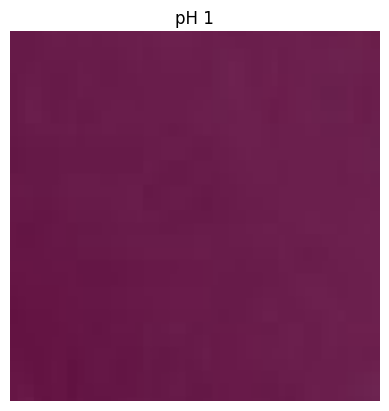

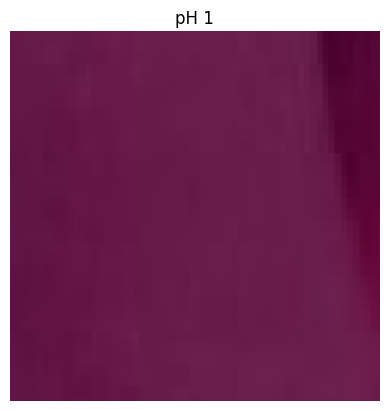

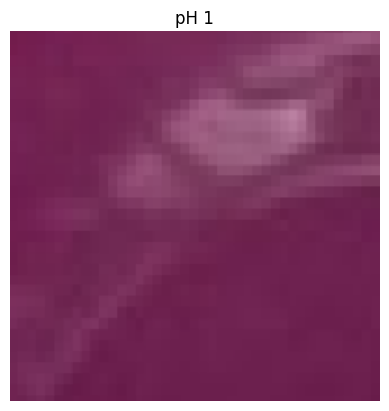

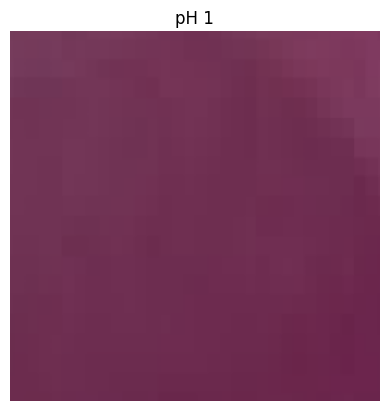

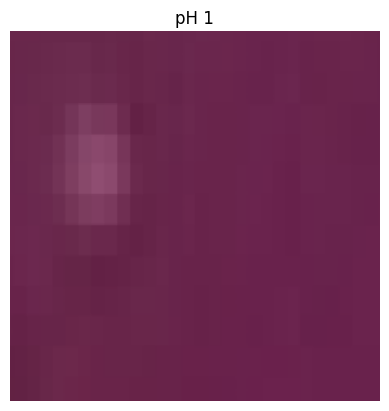

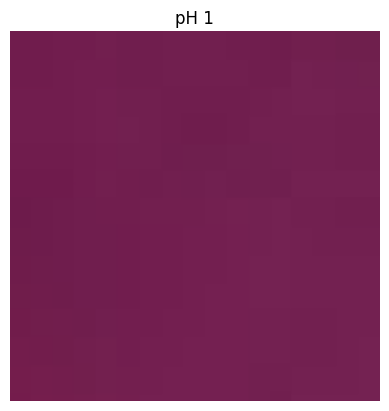

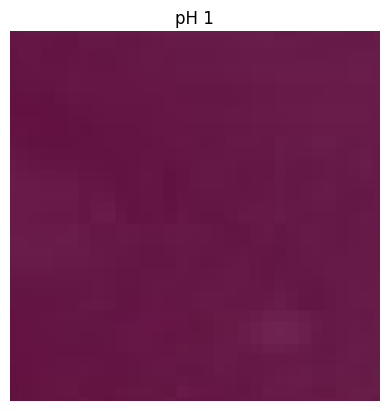

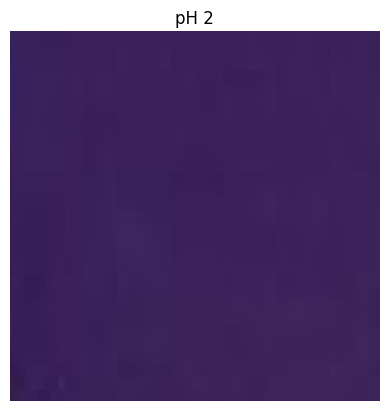

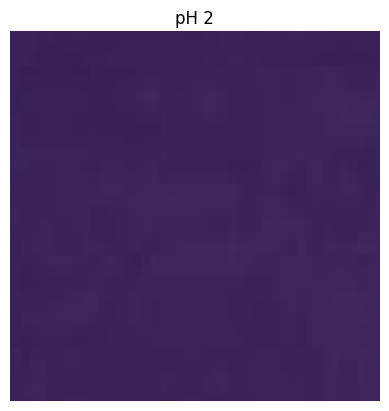

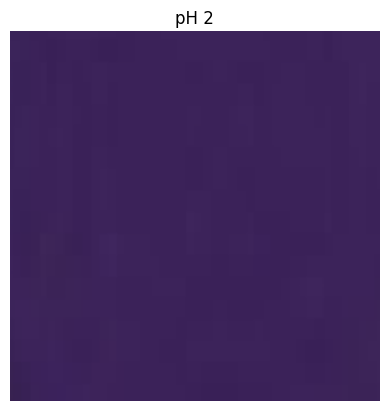

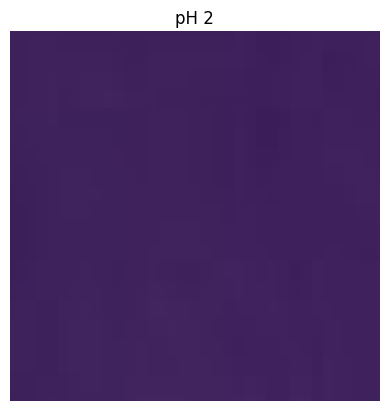

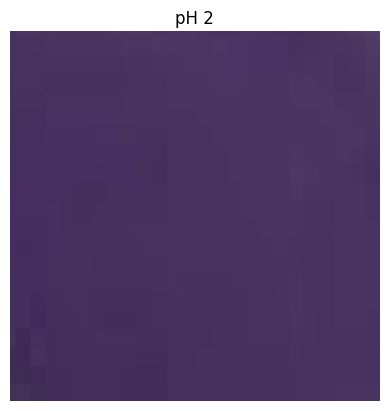

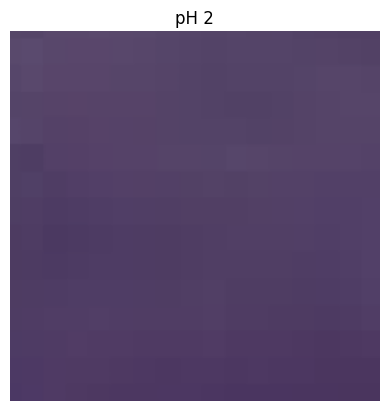

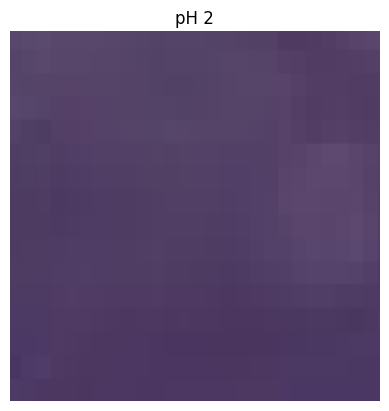

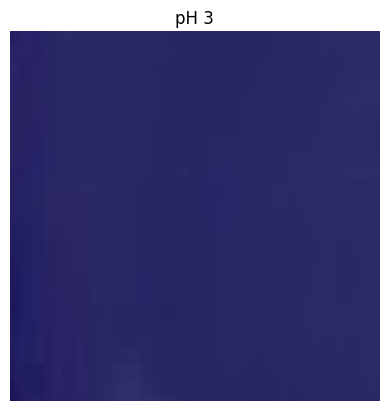

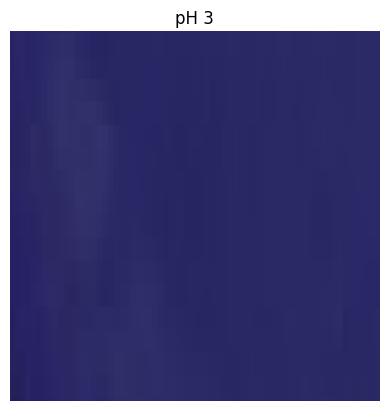

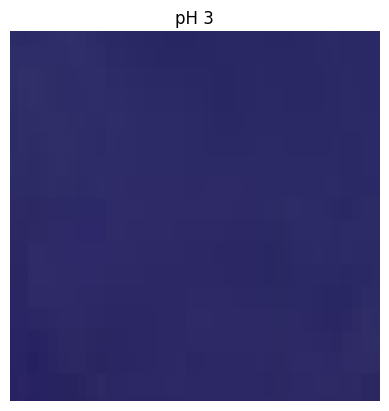

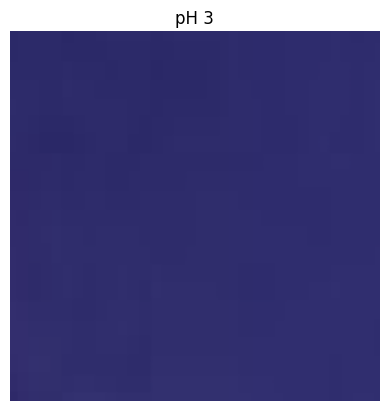

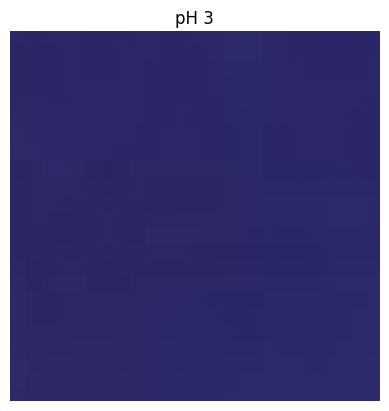

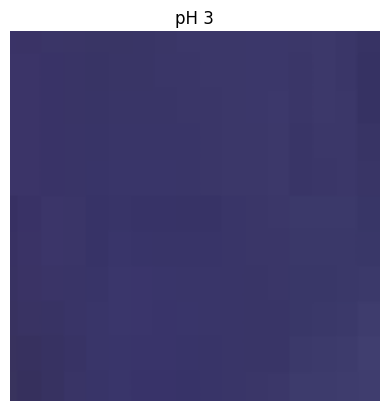

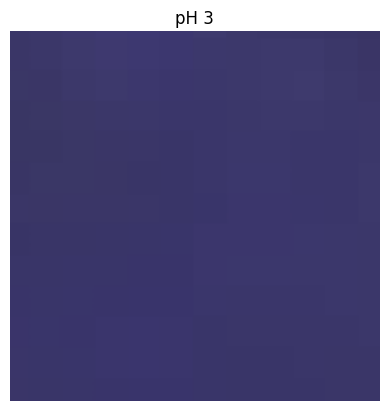

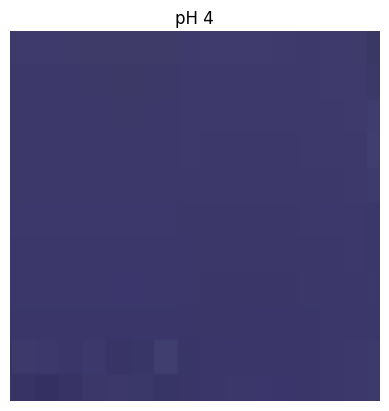

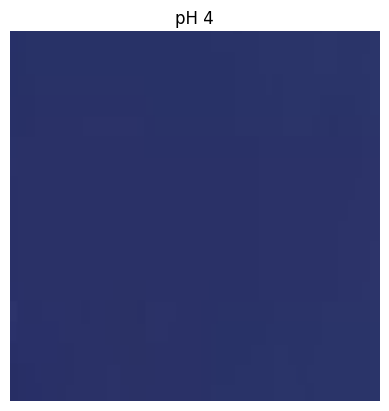

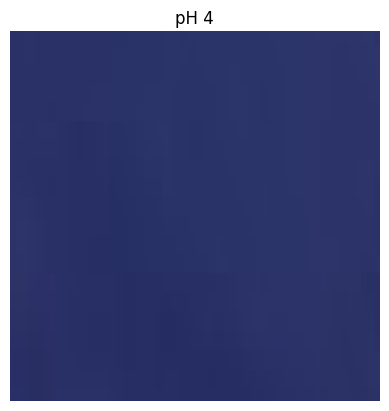

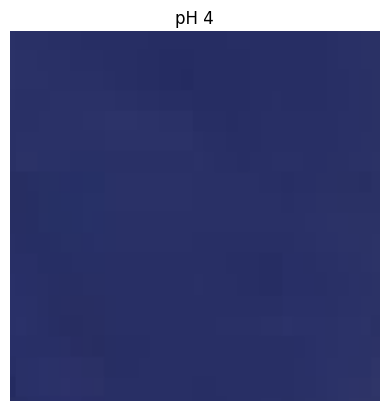

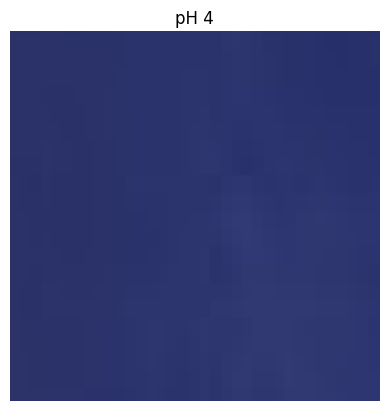

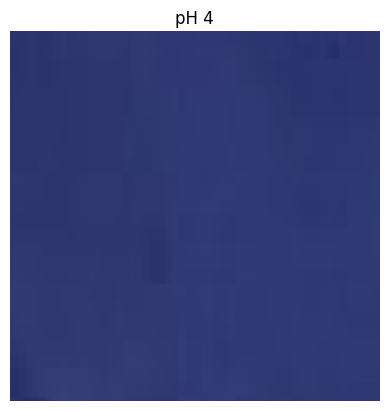

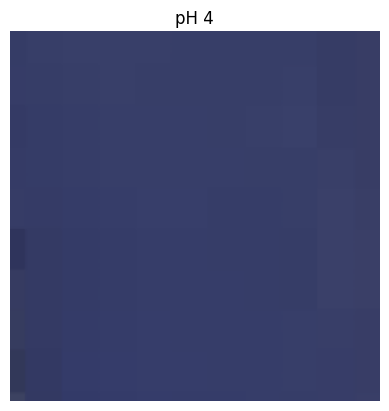

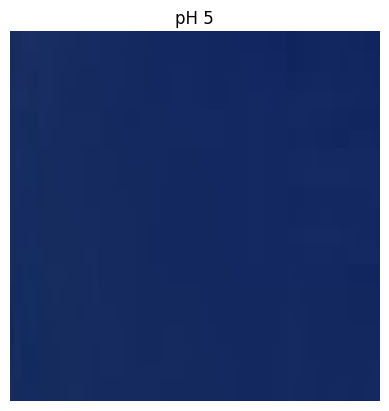

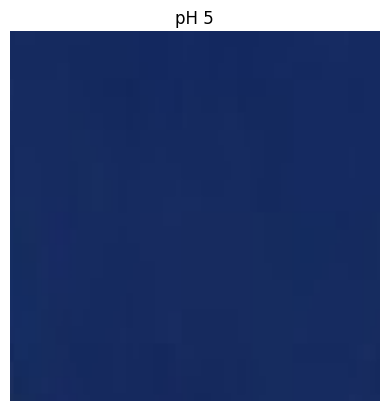

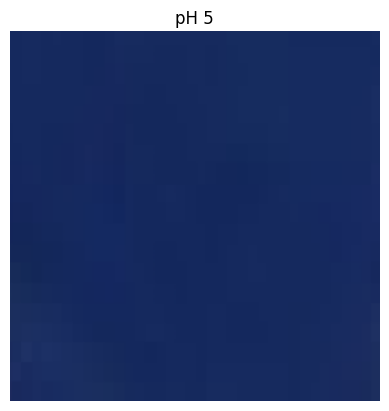

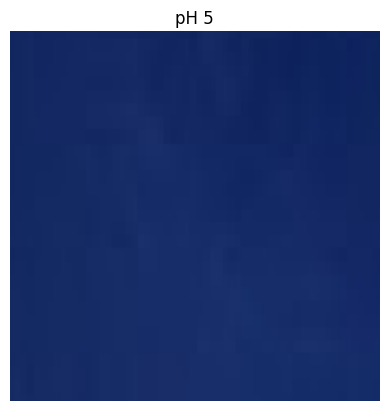

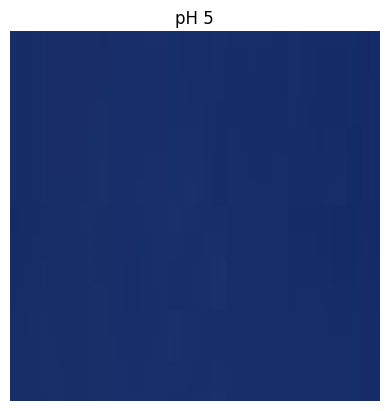

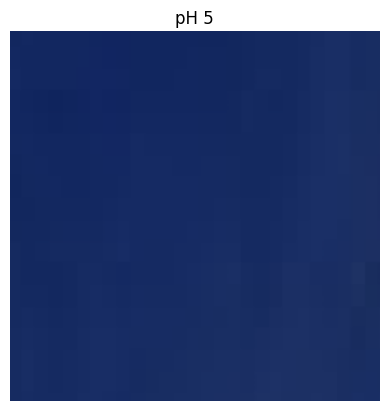

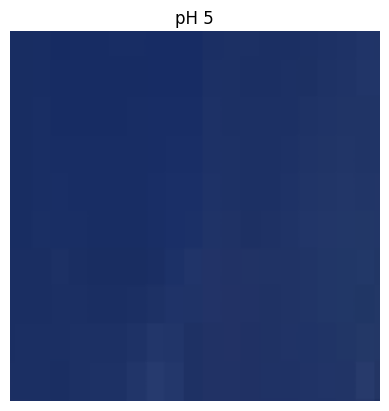

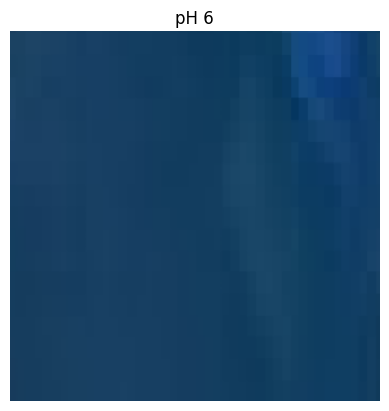

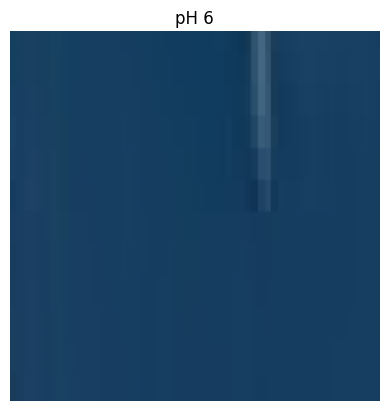

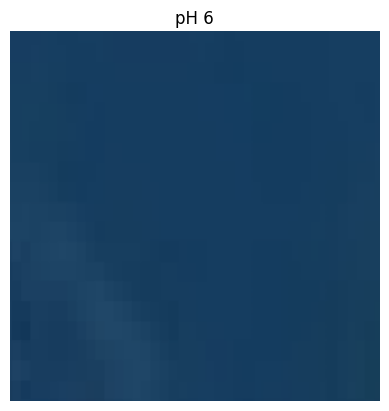

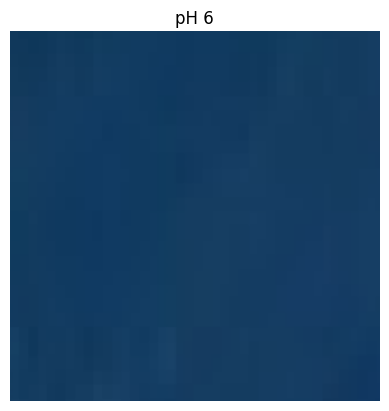

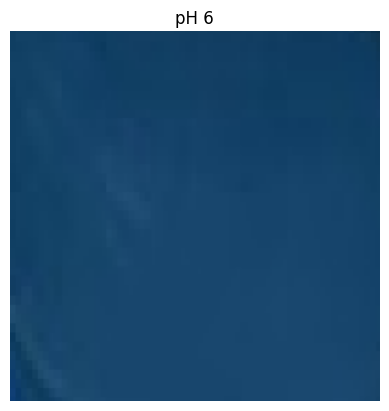

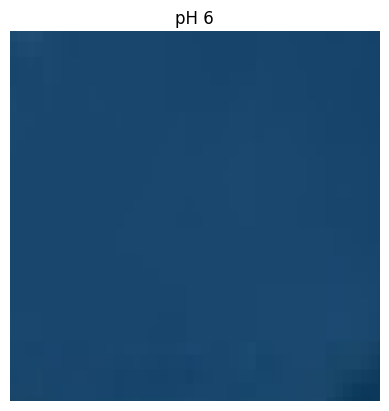

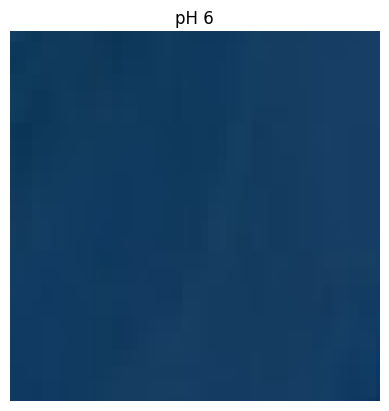

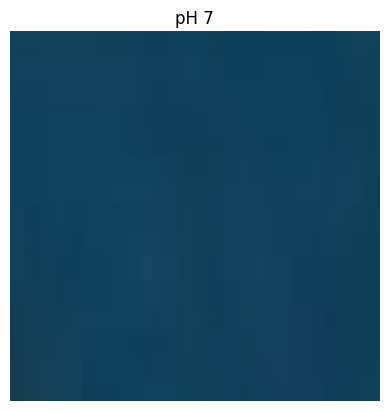

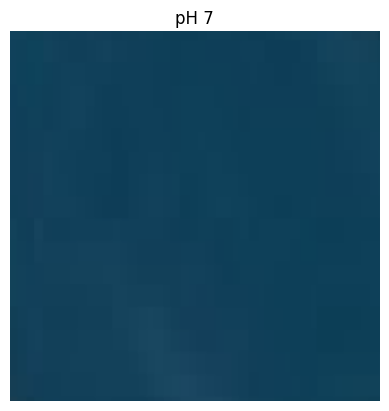

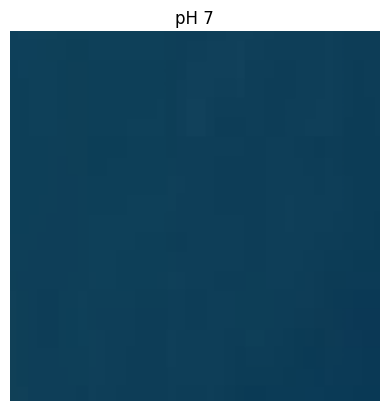

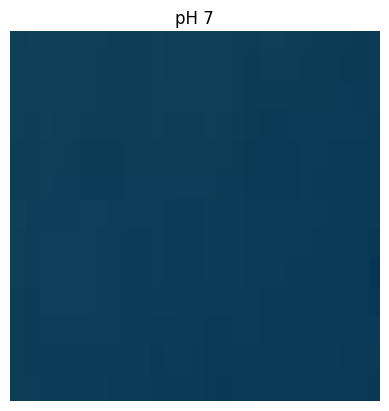

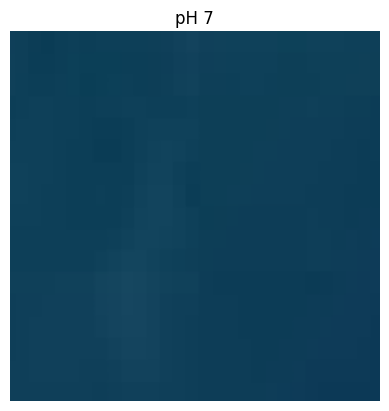

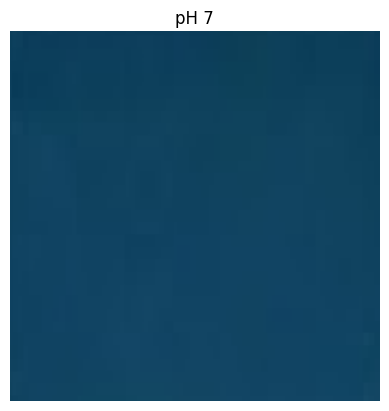

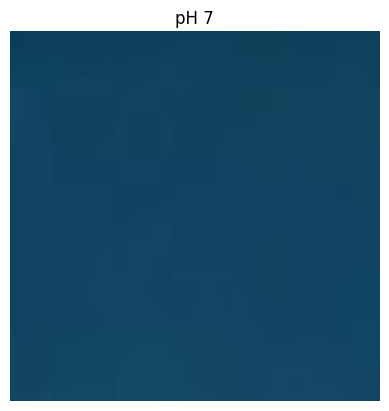

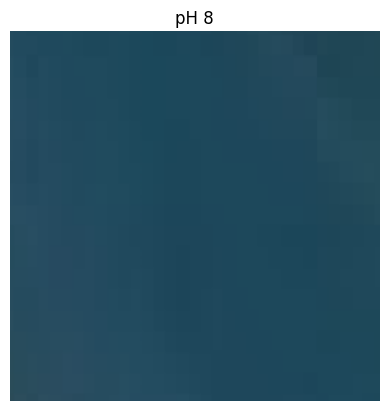

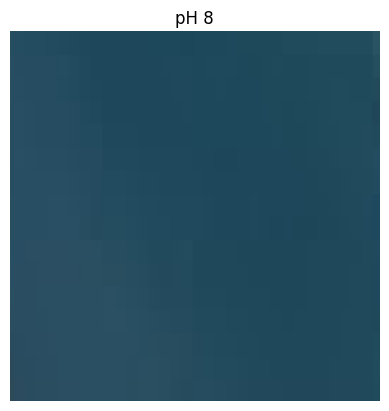

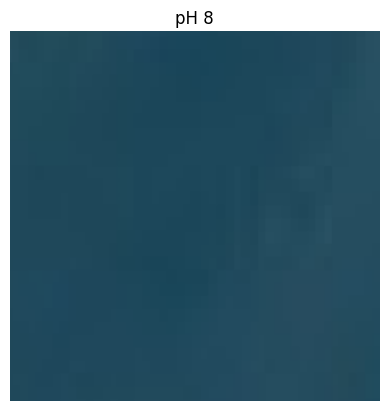

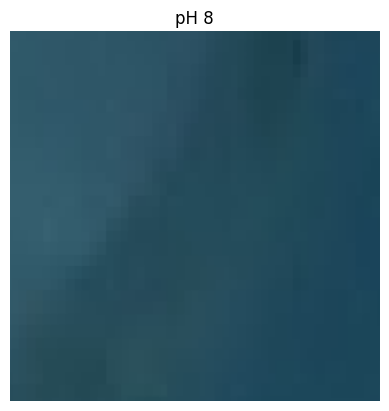

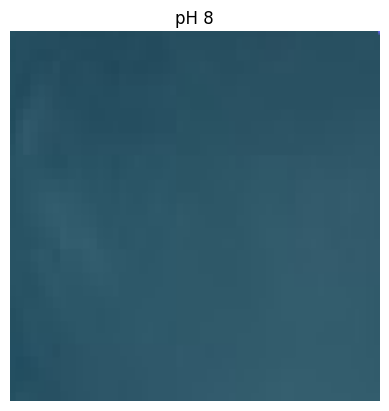

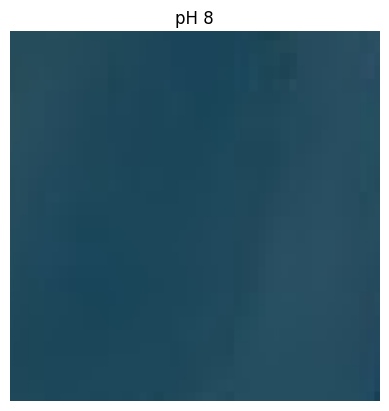

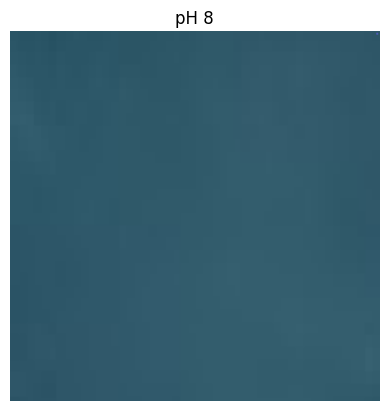

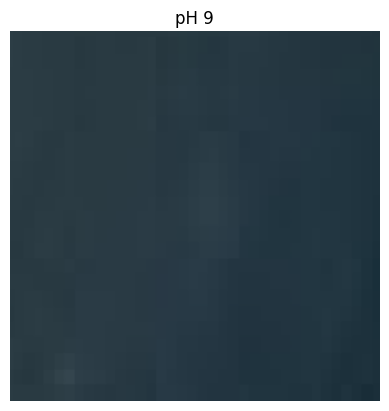

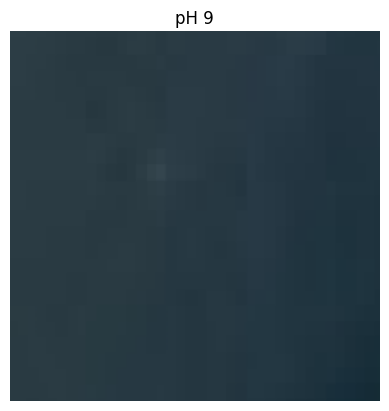

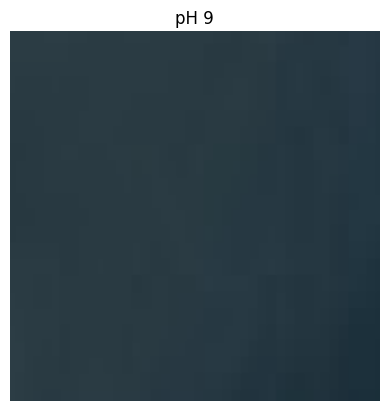

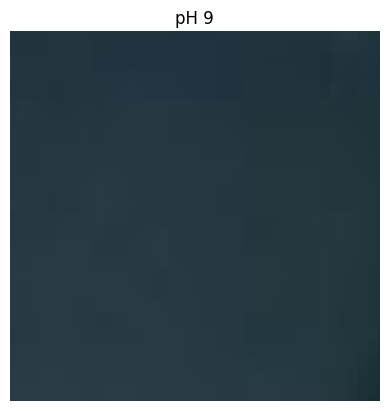

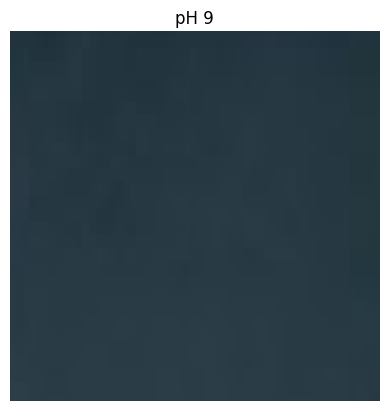

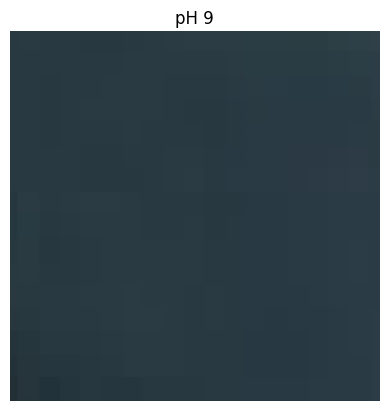

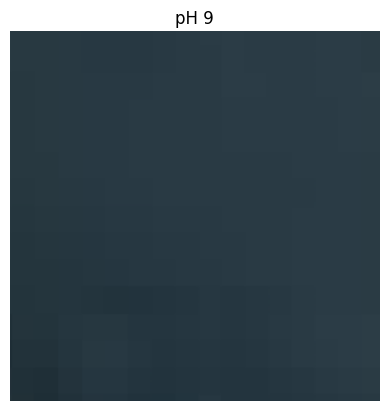

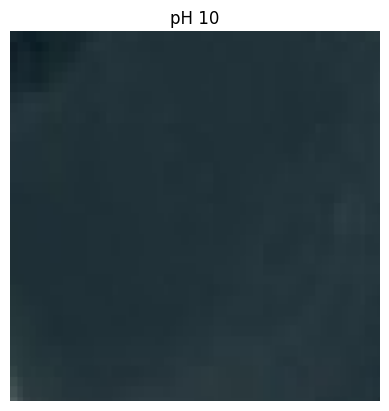

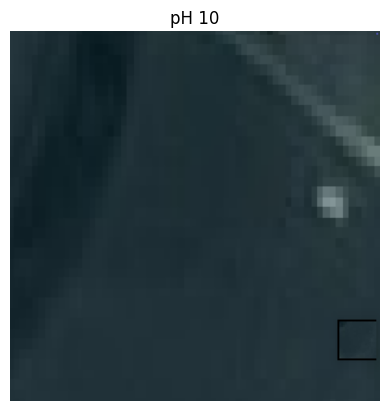

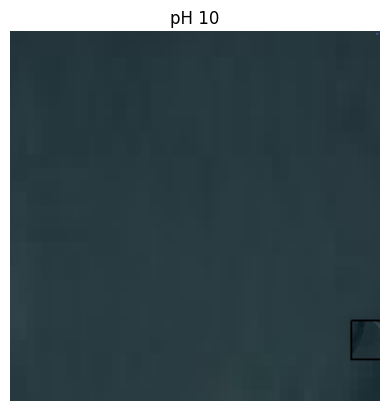

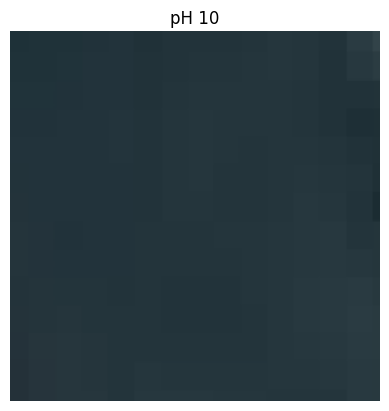

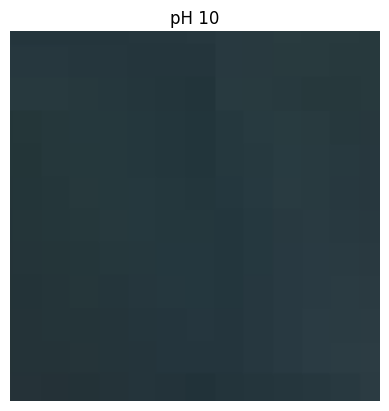

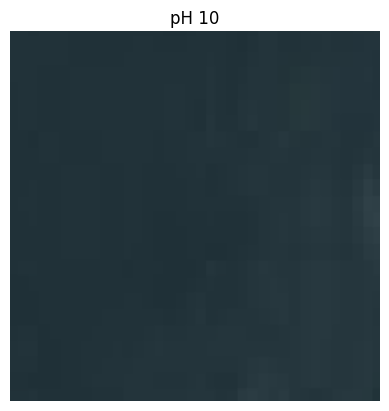

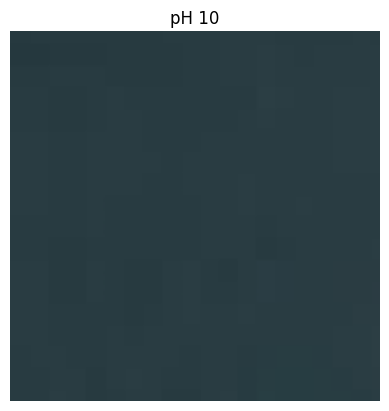

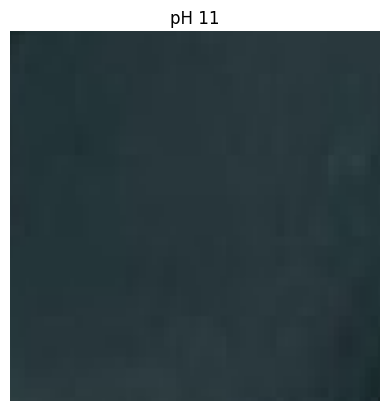

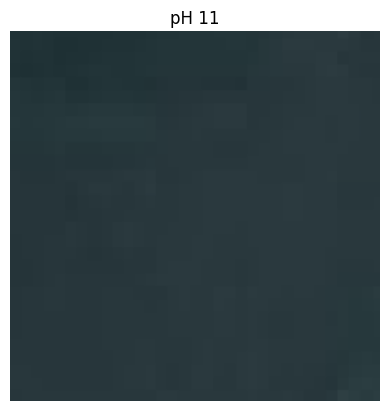

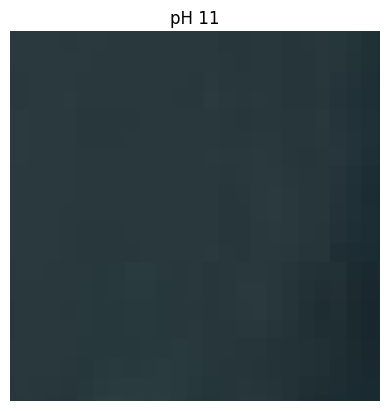

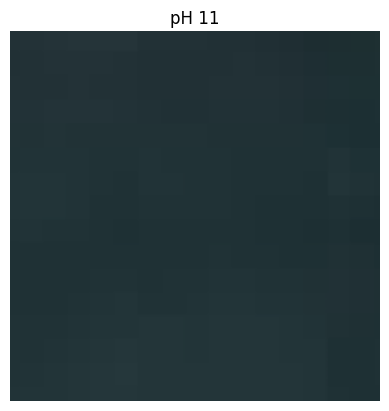

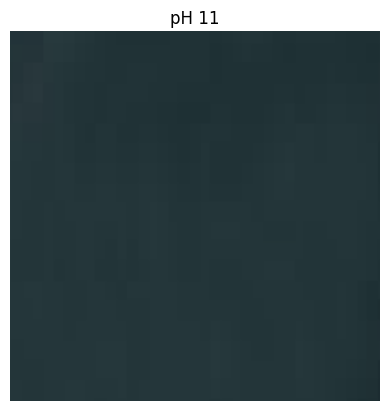

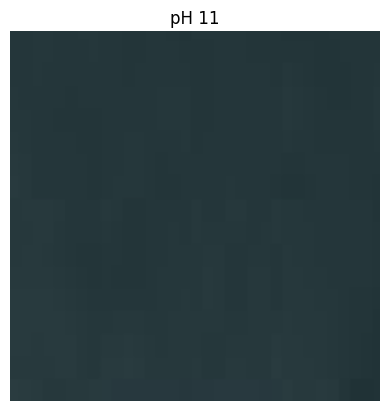

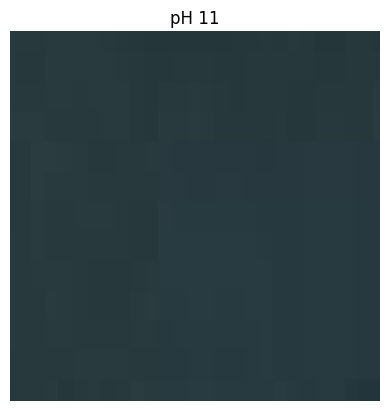

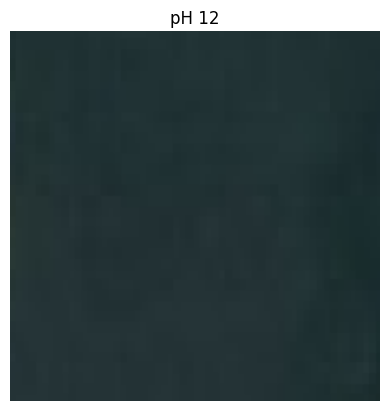

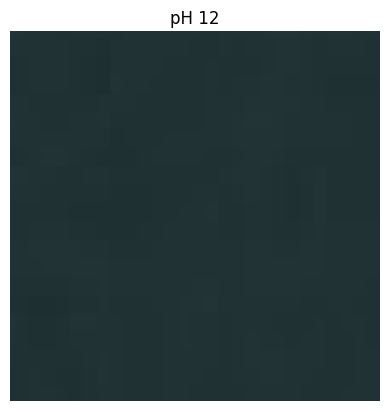

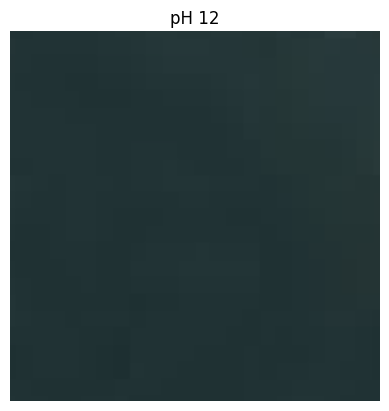

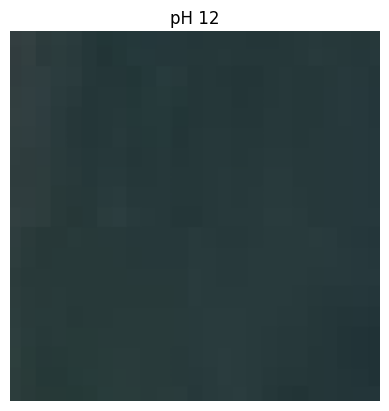

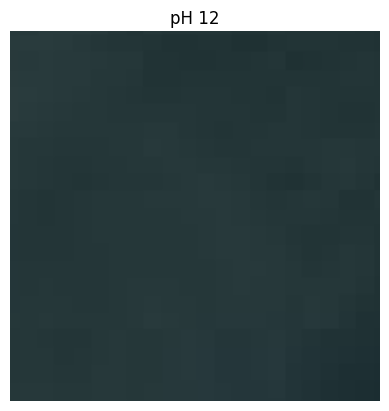

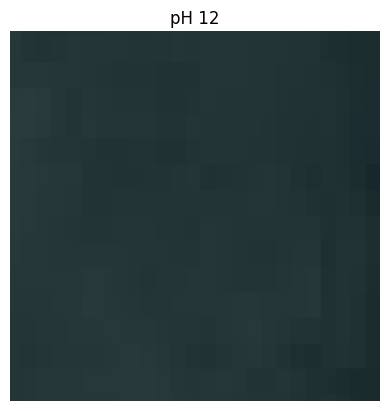

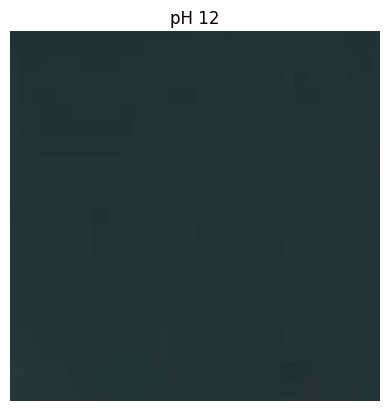

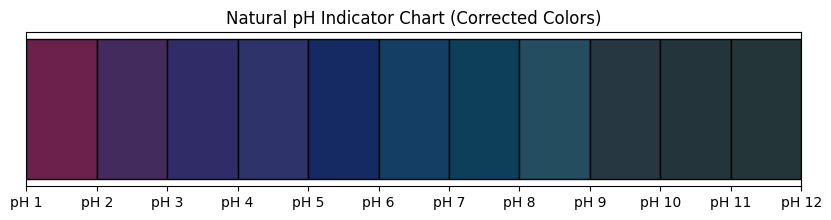

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import re
from collections import defaultdict

# 📌 กำหนดขนาดภาพมาตรฐาน
IMAGE_SIZE = (200, 200)

# 📌 อัปโหลดภาพ
uploaded = files.upload()
ph_data = defaultdict(list)

# 📌 1. โหลดและแสดงภาพตัวอย่างเพื่อตรวจสอบสี
for filename in uploaded.keys():
    match = re.search(r'pH(\d+)', filename)
    if match:
        ph = int(match.group(1))

        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # **แปลง BGR → RGB**
        img = cv2.resize(img, IMAGE_SIZE)  # **ปรับขนาดให้เท่ากัน**

        # 📌 แสดงตัวอย่างภาพ
        plt.figure()
        plt.imshow(img)
        plt.title(f"pH {ph}")
        plt.axis("off")
        plt.show()

        ph_data[ph].append(img)

# 📌 2. คำนวณค่าเฉลี่ยของสี
ph_values = sorted(ph_data.keys())
colors = []

for ph in ph_values:
    img_stack = np.stack(ph_data[ph], axis=0)  # **รวมอาร์เรย์ให้มีขนาดเดียวกัน**
    avg_img = np.mean(img_stack, axis=0).astype(np.uint8)  # คำนวณค่าเฉลี่ยของภาพทั้งหมด
    avg_color = np.mean(avg_img.reshape(-1, 3), axis=0).astype(int)  # คำนวณเฉลี่ยของสีทั้งภาพ
    colors.append(avg_color)

# 📌 3. แปลงสีเป็น 0-1 สำหรับ Matplotlib
colors = np.array(colors) / 255.0

# 📌 4. สร้างแถบสี pH Chart
fig, ax = plt.subplots(figsize=(10, 2))
for i in range(len(ph_values) - 1):
    ax.barh(0, width=ph_values[i+1] - ph_values[i], left=ph_values[i],
            color=colors[i], edgecolor="black", height=1)

ax.set_xticks(ph_values)
ax.set_xticklabels([f"pH {pH}" for pH in ph_values])
ax.set_yticks([])
ax.set_title("Natural pH Indicator Chart (Corrected Colors)")
ax.set_xlim(min(ph_values), max(ph_values))

plt.show()

Saving pH1_1.png to pH1_1 (3).png
Saving pH1_2.png to pH1_2 (2).png
ค่าเฉลี่ยสีจากภาพทั้งหมด (RGB): [102  25  72]
ค่า pH ที่คาดการณ์จากตัวอย่างคือ: pH 1


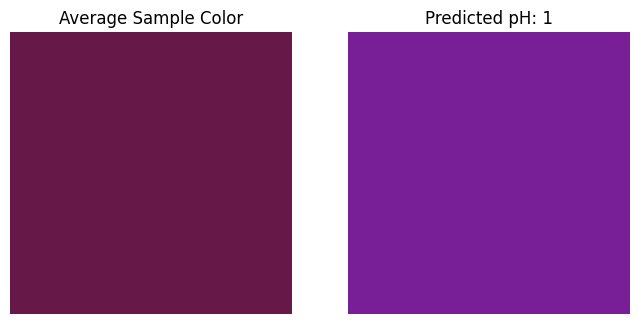

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import re

# 📌 1. อัปโหลดไฟล์ภาพตัวอย่าง
uploaded = files.upload()

# 📌 2. อ่านไฟล์ภาพและดึงค่าเฉลี่ยสีจากหลายภาพ
sample_colors = []  # เก็บค่ารายการสีที่อ่านได้

for filename in uploaded.keys():
    # อ่านภาพ
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # แปลงเป็น RGB

    # คำนวณค่าเฉลี่ยของสี
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    avg_color = avg_color.astype(int)  # แปลงเป็น int

    # เก็บค่าเฉลี่ยของภาพแต่ละภาพ
    sample_colors.append(avg_color)

# 📌 3. คำนวณค่าเฉลี่ยของทุกภาพที่อัปโหลด
if sample_colors:
    avg_sample_color = np.mean(sample_colors, axis=0).astype(int)
    print(f"ค่าเฉลี่ยสีจากภาพทั้งหมด (RGB): {avg_sample_color}")
else:
    print("ไม่พบภาพตัวอย่างที่อัปโหลด")

# 📌 4. ใส่ข้อมูล pH Chart (ค่า RGB ของแต่ละ pH) **ต้องแก้ไขให้ตรงกับ pH Chart ของคุณ**
ph_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ph_colors = [
    [120, 30, 150],  # สีของ pH 1
    [100, 50, 160],  # สีของ pH 2
    [80, 70, 170],   # สีของ pH 3
    [60, 90, 180],   # สีของ pH 4
    [40, 110, 190],  # สีของ pH 5
    [20, 130, 200],  # สีของ pH 6
    [0, 150, 210],   # สีของ pH 7 (เป็นกลาง)
    [30, 170, 190],  # สีของ pH 8
    [50, 190, 170],  # สีของ pH 9
    [70, 210, 150],  # สีของ pH 10
    [90, 230, 130],  # สีของ pH 11
    [110, 250, 110], # สีของ pH 12
]

# 📌 5. คำนวณระยะห่างของสี (Euclidean Distance) เพื่อหา pH ที่ใกล้เคียงที่สุด
def color_distance(c1, c2):
    return np.linalg.norm(np.array(c1) - np.array(c2))

min_distance = float('inf')
predicted_pH = None

for i, ph_color in enumerate(ph_colors):
    dist = color_distance(avg_sample_color, ph_color)
    if dist < min_distance:
        min_distance = dist
        predicted_pH = ph_values[i]

# 📌 6. แสดงผลลัพธ์ค่า pH ที่ใกล้เคียงที่สุด
print(f"ค่า pH ที่คาดการณ์จากตัวอย่างคือ: pH {predicted_pH}")

# 📌 7. แสดงภาพตัวอย่าง พร้อมกับสี pH ที่ใกล้เคียงที่สุด
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# สร้างแถบสีจากค่าเฉลี่ยของตัวอย่าง
ax[0].imshow([[avg_sample_color]])
ax[0].set_title("Average Sample Color")
ax[0].axis("off")

# แสดงสี pH ที่คาดการณ์ได้
ax[1].imshow([[ph_colors[ph_values.index(predicted_pH)]]])
ax[1].set_title(f"Predicted pH: {predicted_pH}")
ax[1].axis("off")

plt.show()